### Training a Perceptron



In [82]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))

    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=f'Class {cl}',
                    edgecolor='black')
    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]
        
        plt.scatter(X_test[:, 0], X_test[:, 1],
                    c='none', edgecolor='black', alpha=1.0,
                    linewidth=1, marker='o',
                    s=100, label='Test set')


In [55]:
from sklearn import datasets
import numpy as np
import warnings
warnings.filterwarnings("ignore")

#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = 'last_expr_or_assign'


iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

print('Class labels:', np.unique(y))
# Class labels are stored as integer. 
# Avoiding tech glitches & improve computational performance, 
# advisable to store class labels as int labels

Class labels: [0 1 2]


In [56]:
from sklearn.model_selection import train_test_split

# already shuffles training set before splitting
# fixed random seed via random state, for internal pseudo random number generator
# that is used for shuffling the dataset prior to splitting
# Ensure are results reproducible
# > Stratify - to return same proportion of train & test subset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [57]:
print('Labels count in input:', np.bincount(y), np.bincount(y_train), np.bincount(y_test))

Labels count in input: [50 50 50] [35 35 35] [15 15 15]


In [58]:
from sklearn.preprocessing import StandardScaler
# intialize the object
sc = StandardScaler()
# Fit method estimated mean & varioance for each dimension from training data
sc.fit(X_train)
# standardized those dimension using estimated parameter
# standardize both train and test with same estimate to make comparable with one another
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

array([[ 0.89820289,  1.44587881],
       [-1.16537974, -1.04507821],
       [-1.33269725, -1.17618121],
       [ 0.39625036,  0.65926081],
       [ 0.34047786,  0.2659518 ],
       [ 0.11738784,  0.1348488 ],
       [ 1.12129291,  0.79036381],
       [ 0.39625036,  0.3970548 ],
       [ 0.84243039,  0.92146681],
       [-1.38846976, -1.04507821],
       [-1.27692475, -1.04507821],
       [ 0.61934037,  0.79036381],
       [-1.33269725, -1.30728421],
       [-0.27301968, -0.2584602 ],
       [-1.33269725, -1.30728421],
       [ 0.56356787,  0.2659518 ],
       [ 0.73088538,  1.44587881],
       [ 0.39625036,  0.3970548 ],
       [ 0.28470535,  0.1348488 ],
       [ 0.78665788,  1.05256981],
       [ 1.17706541,  1.18367281],
       [-1.33269725, -1.43838721],
       [ 0.34047786,  0.2659518 ],
       [ 0.61934037,  1.05256981],
       [ 0.22893285,  0.1348488 ],
       [ 0.50779537,  0.5281578 ],
       [-0.4403372 , -0.1273572 ],
       [ 1.0655204 ,  1.70808482],
       [-1.22115225,

In [59]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(eta0=0.01, random_state=1)
ppn.fit(X_train_std, y_train)
# eta is learning rate, if too large, it overshoots the global loss minimum
# if too small, require more epoch  until convergence

Perceptron(eta0=0.01, random_state=1)

In [60]:
y_pred = ppn.predict(X_test_std)
print('Misclassified sample: %d' %(y_test != y_pred).sum())
# classification error versus accuracy - 
# 1 - misclassification error = accuracy

Misclassified sample: 2


In [61]:
from sklearn.metrics import accuracy_score
print('Accuracy: %.3f' %accuracy_score(y_test, y_pred))

# this method combines predict and score
print('Accuracy: %.3f' %ppn.score(X_test_std, y_test))

# Overfitting -> The model capture the pattern in training data well
# but fails to generalize well to unseen data


Accuracy: 0.956
Accuracy: 0.956


### Modeling class probabilities via Logistic Regression



In [62]:
np.arange(-7, 7, 0.1)

array([-7.00000000e+00, -6.90000000e+00, -6.80000000e+00, -6.70000000e+00,
       -6.60000000e+00, -6.50000000e+00, -6.40000000e+00, -6.30000000e+00,
       -6.20000000e+00, -6.10000000e+00, -6.00000000e+00, -5.90000000e+00,
       -5.80000000e+00, -5.70000000e+00, -5.60000000e+00, -5.50000000e+00,
       -5.40000000e+00, -5.30000000e+00, -5.20000000e+00, -5.10000000e+00,
       -5.00000000e+00, -4.90000000e+00, -4.80000000e+00, -4.70000000e+00,
       -4.60000000e+00, -4.50000000e+00, -4.40000000e+00, -4.30000000e+00,
       -4.20000000e+00, -4.10000000e+00, -4.00000000e+00, -3.90000000e+00,
       -3.80000000e+00, -3.70000000e+00, -3.60000000e+00, -3.50000000e+00,
       -3.40000000e+00, -3.30000000e+00, -3.20000000e+00, -3.10000000e+00,
       -3.00000000e+00, -2.90000000e+00, -2.80000000e+00, -2.70000000e+00,
       -2.60000000e+00, -2.50000000e+00, -2.40000000e+00, -2.30000000e+00,
       -2.20000000e+00, -2.10000000e+00, -2.00000000e+00, -1.90000000e+00,
       -1.80000000e+00, -

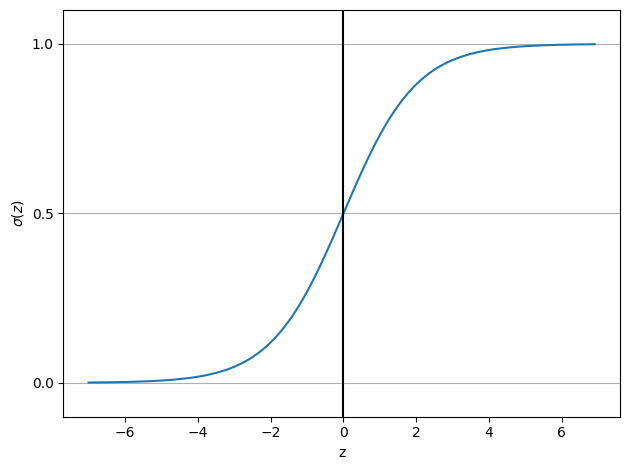

In [63]:
import matplotlib.pyplot as plt
import numpy as np
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
sigma_z = sigmoid(z)
plt.plot(z, sigma_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\sigma (z)$')

# y axis ticks and gridlines
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

# as z aproaches -> infintiy, then sigma(z) is 1, as the
# value of e^(-z) becomes small
# az z approaches -> negative infinity, the sigma(z) is 0, as the
# value of e^(-z) becomes large

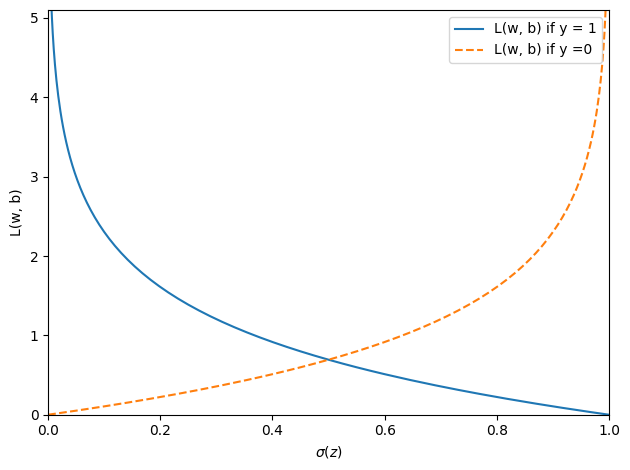

' \nThe main point is that we penalize the wrong prediction with an increaingly larger loss\n\n'

In [64]:
def loss_1(z):
    return -np.log(sigmoid(z))

def loss_0(z):
    return -np.log(1 - sigmoid(z))
# range of z values
z = np.arange(-10, 10, 0.1)
# Calling sigmoid function. It will covert real values to [0,1] range
sigma_z = sigmoid(z)
# loss for y=1 with values in z
c1 = [loss_1(x) for x in z]
plt.plot(sigma_z, c1, label='L(w, b) if y = 1')
c0 = [loss_0(x) for x in z]
plt.plot(sigma_z, c0, linestyle='--', label='L(w, b) if y =0')
plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel('$\sigma(z)$')
plt.ylabel('L(w, b)')
plt.legend(loc='best')
plt.tight_layout()
plt.show()
''' 
The main point is that we penalize the wrong prediction with an increaingly larger loss

'''

### Training a logistic regression with scikit-learn


In [65]:
from sklearn.linear_model import LogisticRegression

# multi_class = 'multinomial' is deafult
# available for mutually exclusive classes. Each training example can belong to only one
# multilable where trainig example can belong to multiple class
# optimization parameter with solver. More advanced approach the SGD
# Minimizing convex loss functions

lr = LogisticRegression(C=100.0, solver='lbfgs', multi_class='ovr')
lr.fit(X_train_std, y_train)

LogisticRegression(C=100.0, multi_class='ovr')

In [66]:
# What is C ?
# to predict probability of a example belonging to certain class
lr.predict_proba(X_test_std[:3, :])

# first row corresponds to class membership of first flower
# column wise sum of each row is 1
# Higest value in row 1 is of class 3 with 0.85, i.e. predicted probability of 85%
lr.predict_proba(X_test_std[:3, :]).sum(axis=1)

# Get the predicted class label by indentifying largest column in each row
lr.predict_proba(X_test_std[:3, :]).argmax(axis=1)

# More convenient way is to use predict method
lr.predict(X_test_std[:3, :])

# scikit-learn expect 2D data. So for just one row entry
# we convert the data in 2D by adding a dimension
lr.predict(X_test_std[0, :].reshape(1, -1))

array([2])

### Tackling overfitting via regularization

A model performs well on training data but does not generalize well on unseen data
This model have high variance, Which can be caused by having too many parameters

Underfitting (A High bias) the model does not capture patterns on training data, hence
suffer with unseen data as well.

Variance mesure the consistency of model's prediction for classifying a particular example
if we retrain the model multiple times, for example on different subset of training dataset.
Model is sensitive to the randomness in the training data.

Bias measures how far the predictions are from correct values in general if we rebuold the model
multiple times on different training dataset; bias is a measure of systematic error not due to randomness


Regularization helps in tune the model complexity. It is useful with handling high collinearity, and filtering noise from data and thus preventing overfitting. To introduce additional parameter to penalize extreme weight values.

For regularization to work, we need to ensure all features are on comparable scale.

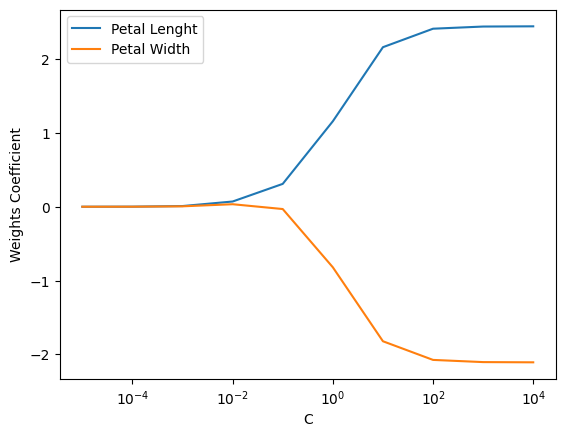

In [67]:
weights, params = [], []
for c in np.arange(-5, 5): # 10 values, with last one not included
    lr = LogisticRegression(C=10.**c, multi_class='ovr')
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1]) # output in ndarray of (n_classes, n_features)
    # Only collecting the weight coefficient of class 1
    params.append(10.**c)

weights = np.array(weights) # a list of array to numpy array

plt.plot(params, weights[:, 0], label='Petal Lenght')
plt.plot(params, weights[:, 1], label='Petal Width')

plt.ylabel('Weights Coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()


In [48]:
np.arange(-5, 5)
lr = LogisticRegression(C=10, multi_class='ovr')
lr.fit(X_train_std, y_train)
lr.coef_ # ndarray of shape (1, n_features) or (n_classes, n_features)
np.array(lr.coef_)


array([-5, -4, -3, -2, -1,  0,  1,  2,  3,  4])

LogisticRegression(C=10, multi_class='ovr')

array([[-3.93677087, -3.33345856],
       [ 2.16048235, -1.82179148],
       [ 5.57492655,  4.27146583]])

array([[-3.93677087, -3.33345856],
       [ 2.16048235, -1.82179148],
       [ 5.57492655,  4.27146583]])

### SVM - Solving linear and nonlinear problem via Kernel methods

In [70]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0, random_state=1) # C here control the width of margin. 
# decrease C, increase the bias and lowers variance (overfitting), less srict about misclassfication error
# large C corresponds to larger error penalty
svm.fit(X_train_std, y_train)

SVC(kernel='linear', random_state=1)

In [71]:
# sckit-learn offers alternate implementation via SGDClassifier, 
# which only supports online learning via partial_fit
from sklearn.linear_model import SGDClassifier
ppn = SGDClassifier(loss='perceptron')
lr = SGDClassifier(loss='log')
scm = SGDClassifier(loss='hinge')

SGDClassifier()

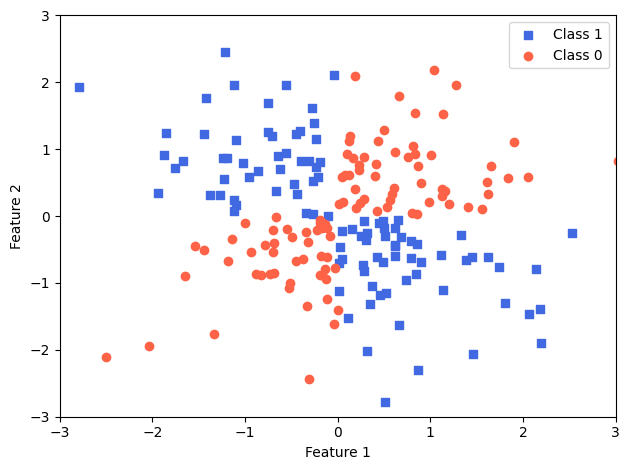

In [80]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(1)
X_xor = np.random.randn(200, 2) # a 200 by 2 matrix, with 200 rows, 2 columns
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, 0)

plt.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == 1, 1],
            c='royalblue', marker='s', label='Class 1')
plt.scatter(X_xor[y_xor == 0, 0],
            X_xor[y_xor ==0, 1],
            c='tomato', marker='o', label='Class 0')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

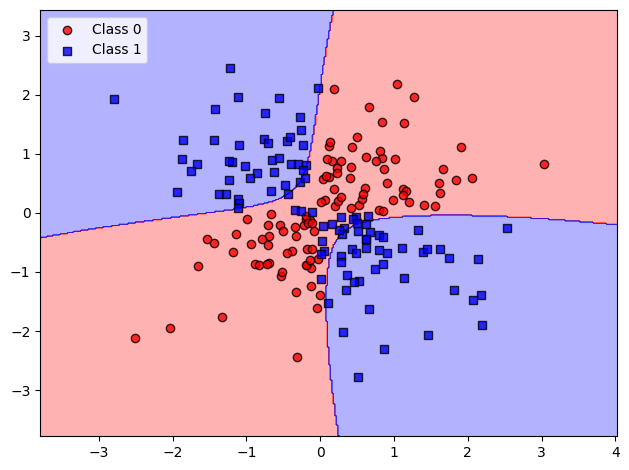

In [83]:
# implemention kernel methods
svm = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

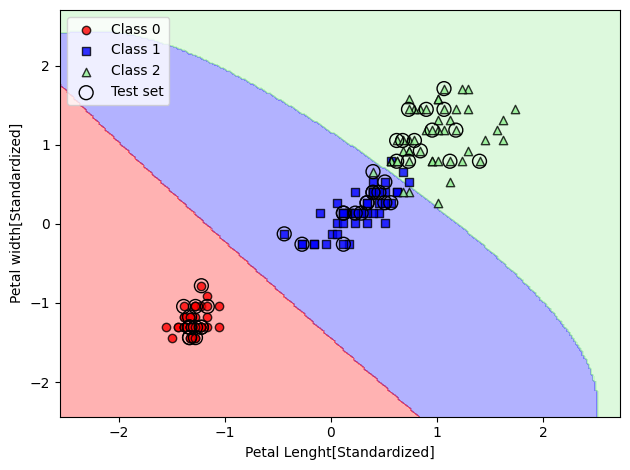

In [84]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
# gamma can be understood as a cut off parameter for gaussian sphere
# if we increase value of Y we increase sphere of influence or reach of training examples
# leads to tighter or bumpier decision boundary
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, classifier=svm,
                      test_idx=range(105, 150))
plt.xlabel('Petal Lenght[Standardized]')
plt.ylabel('Petal width[Standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

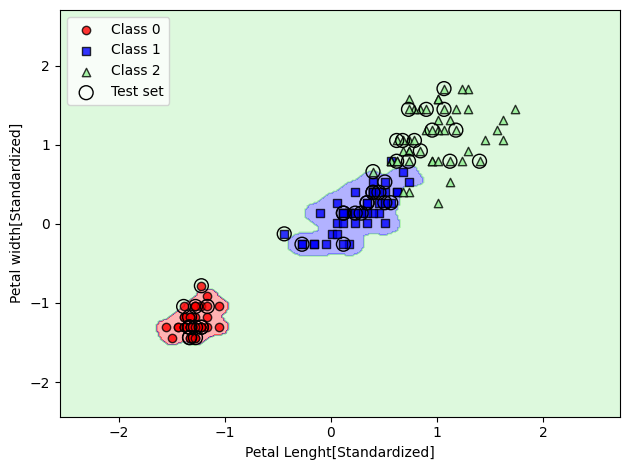

In [85]:
svm = SVC(kernel='rbf', random_state=1, gamma=100.0, C=1.0)
# gamma can be understood as a cut off parameter for gaussian sphere
# if we increase value of Y we increase sphere of influence or reach of training examples
# leads to tighter or bumpier decision boundary
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, classifier=svm,
                      test_idx=range(105, 150))
plt.xlabel('Petal Lenght[Standardized]')
plt.ylabel('Petal width[Standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

### Decision Tree - Maximizing IG

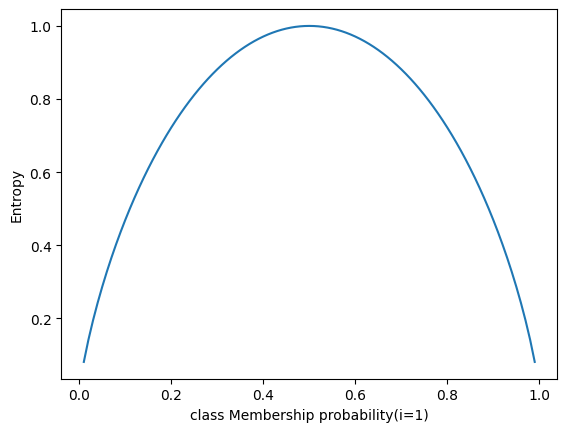

In [86]:
def entropy(p):
    return -p * np.log2(p) - (1 - p) * np.log2((1 - p))
x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p != 0 else None for p in x]
plt.ylabel('Entropy')
plt.xlabel('class Membership probability(i=1)')
plt.plot(x, ent)
plt.show()

AttributeError: 'tuple' object has no attribute 'plot'

<Figure size 640x480 with 0 Axes>

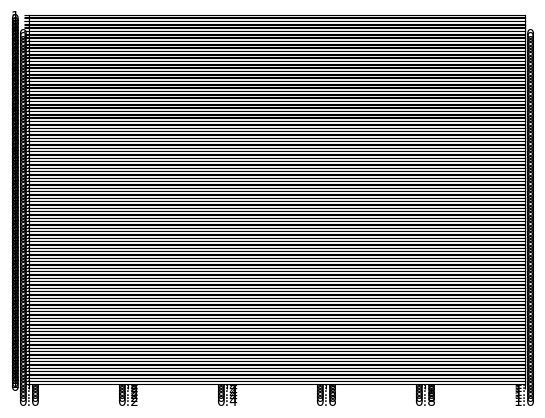

In [89]:
import matplotlib.pyplot as plt
import numpy as np

def gini(p):
    return p * (1 - p) + (1 - p) * (1 - (1 - p))

def entropy(p):
    return - p * np.log2(p) - (1 - p) * np.log2((1 - p))

def error(p):
    return 1 - np.max([p, 1 - p])

x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e*0.5 if e else None for e in ent]
err = [error(i) for i in x]
fig = plt.figure()
ax = plt.subplots(111)

for i, lab, ls, c in zip([ent, sc_ent, gini(x), err],
                         ['Entropy', 'Entropy (scaled)', 'Gini Imourity',
                          'Misclassification error'],
                          ['-', '-', '--', '-.'],
                          ['black', 'lightgray', 'red', 'green', 'cyan']):
    
    line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=5, fancybox=True, shadow=False)
ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('impurity index')
plt.show()